In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
for dirname, _, filename in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

In [4]:
data.shape

(200, 5)

In [6]:
X = data[["TV"]]
Y = data[["Sales"]]
reg_model = LinearRegression().fit(X,Y)
b = reg_model.intercept_[0]
M = reg_model.coef_[0][0]
print("Lienar Regression parameters at : b = {0}, M = {1}".format(b,M))

Lienar Regression parameters at : b = 7.032593549127695, M = 0.04753664043301975


In [7]:
reg_model.intercept_[0] + reg_model.coef_[0][0] * 150

14.163089614080658

In [8]:
new_data = [150]
new_data = pd.DataFrame(new_data,columns=['TV'])
reg_model.predict(new_data)

array([[14.16308961]])

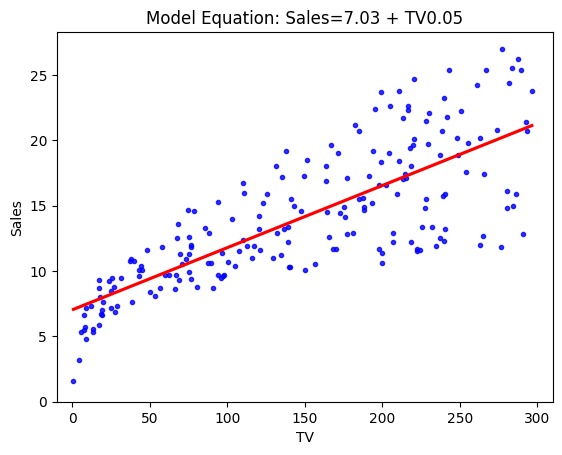

In [9]:
g = sns.regplot(x=X, y=Y, scatter_kws={'color':'b', 's':9}, ci=False, color="r")
g.set_title(f"Model Equation: Sales={round(reg_model.intercept_[0], 2)} + TV{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Sales")
g.set_xlabel("TV")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [10]:
Y_pred = reg_model.predict(X)
mean_squared_error(Y,Y_pred)

10.512652915656757

In [11]:
np.sqrt(mean_squared_error(Y,Y_pred))

3.2423221486546887

In [12]:
mean_absolute_error(Y,Y_pred)

2.549806038927486

In [13]:
reg_model.score(X,Y)

0.611875050850071

In [14]:
X = data[['TV', 'Radio', 'Newspaper']]
Y = data[["Sales"]]

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=1)
reg_model = LinearRegression()
reg_model.fit(X_train, Y_train)
reg_model.intercept_
reg_model.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

In [18]:
new_data = [[30], [10], [40]]
new_data = pd.DataFrame(new_data).T
new_data.columns=['TV','Radio','Newspaper']
reg_model.predict(new_data)

array([[6.202131]])

In [19]:
Y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(Y_train, Y_pred))

1.736902590147092

In [20]:
reg_model.score(X_train,Y_train)

0.8959372632325174

In [21]:
Y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(Y_test,Y_pred))

1.4113417558581587

In [23]:
reg_model.score(X_test,Y_test)

0.8927605914615384

In [24]:
np.mean(np.sqrt(-cross_val_score(reg_model,X,Y,cv=10,scoring="neg_mean_squared_error")))

1.6913531708051797

In [30]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquantile_range = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * interquantile_range
  low_limit = quartile1 -1.5 * interquantile_range
  return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
  low_limit, up_limit = outlier_thresholds(dataframe, variable)
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
  dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

def check_outlier(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe,col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

def grab_outlier(dataframe, col_name, index=False):
  low,up = outlier_thresholds(dataframe, col_name)
  if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] >10:
    print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] >up))].head())
  else:
    print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] >up))])
  if index:
    outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
    return outlier_index



In [31]:
grab_outlier(data, 'Newspaper', index=False)

     Unnamed: 0     TV  Radio  Newspaper  Sales
16           17   67.8   36.6      114.0   12.5
101         102  296.4   36.3      100.9   23.8


In [32]:
replace_with_thresholds(data, 'Newspaper')

In [33]:
grab_outlier(data, 'Newspaper', index=False)

Empty DataFrame
Columns: [Unnamed: 0, TV, Radio, Newspaper, Sales]
Index: []


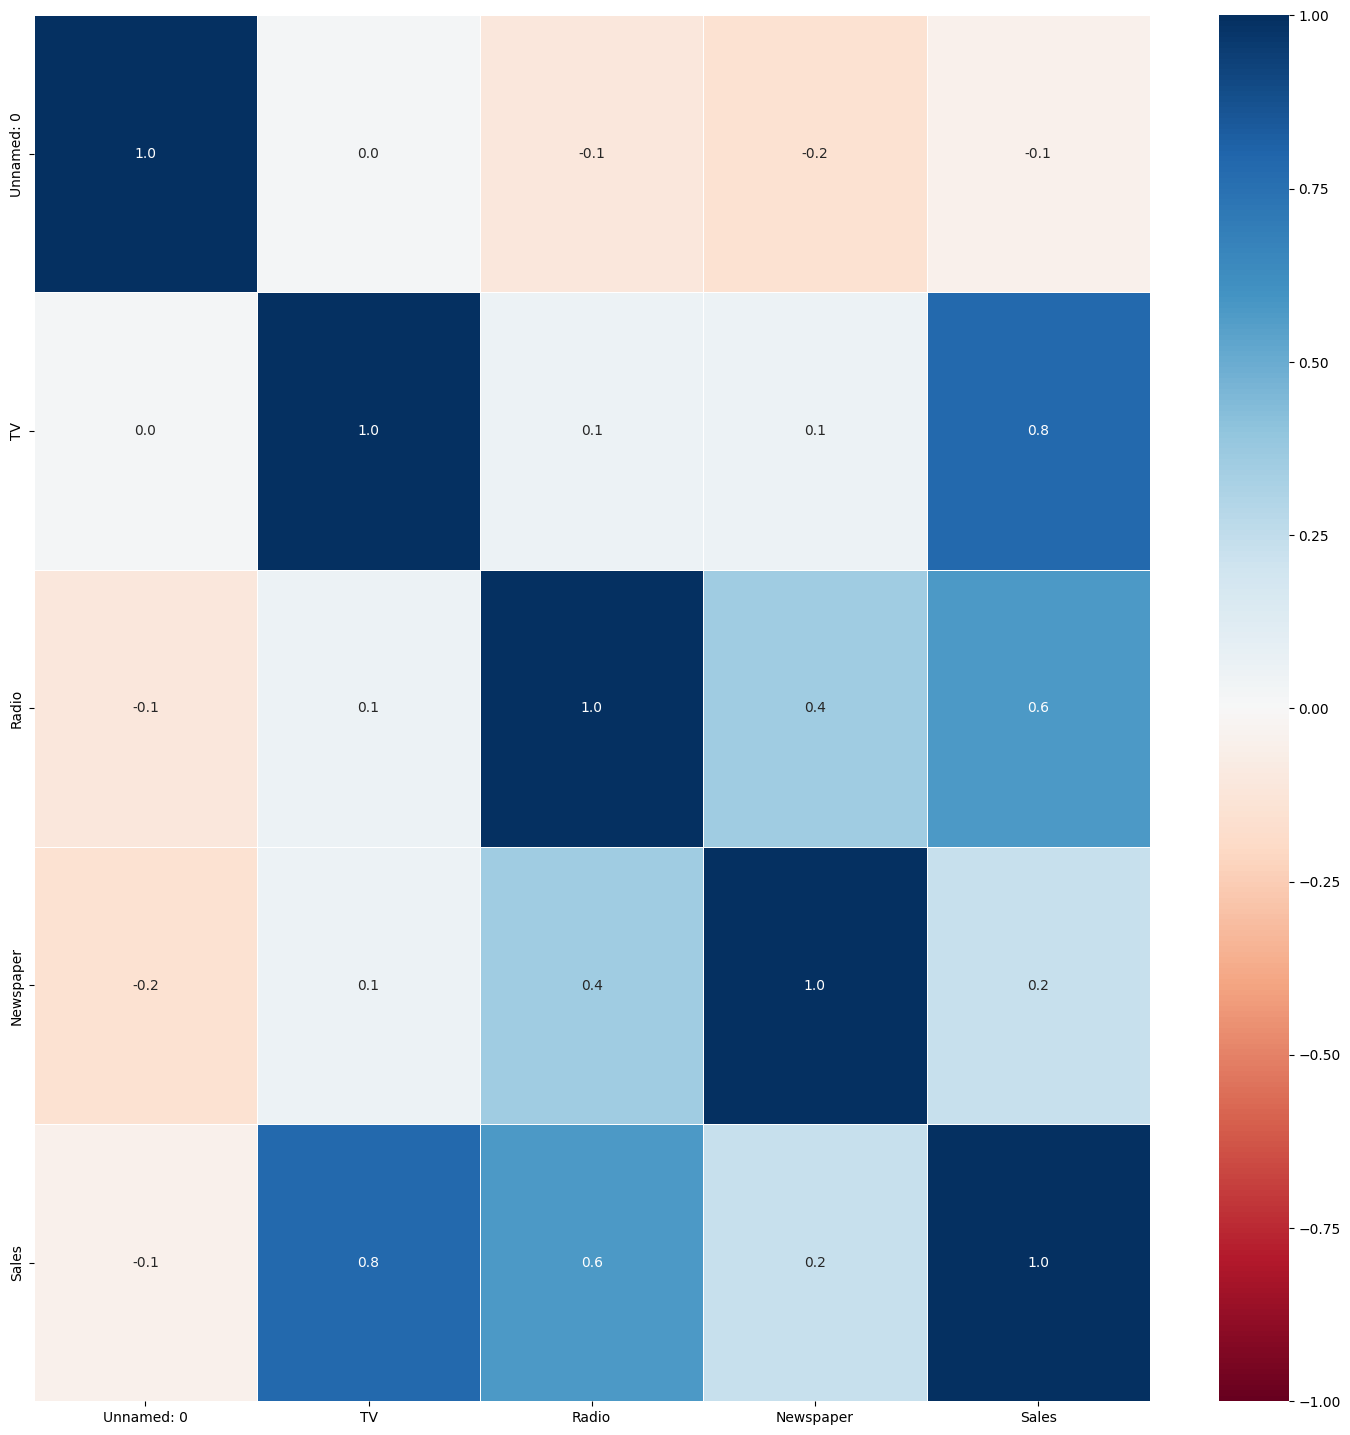

In [34]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, cmap='RdBu', fmt='.1f', ax=ax, vmin=-1)
plt.show()

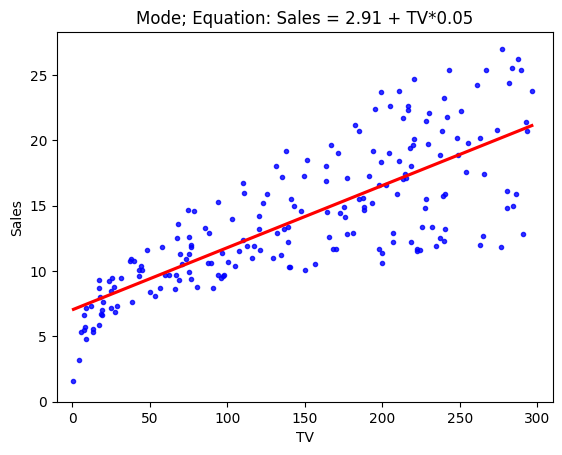

In [37]:
g = sns.regplot(x=X['TV'], y=Y, scatter_kws={'color': 'b', 's':9},ci=False, color="r")
g.set_title(f"Mode; Equation: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Sales")
g.set_xlabel("TV")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()